In [16]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [23]:
def mse_line(x, t, w):
    y = w[0]*x +w[1]
    mse = np.mean((y-t)**2)
    return mse

In [29]:
np.random.seed(seed=1)

In [30]:
X_min =4
X_max = 30
X_n = 16
X = 5 +25*np.random.rand(X_n)
prm_c = [170, 108, 0.2]

T = prm_c[0] - prm_c[1] *np.exp(-prm_c[2]*X) + 4* np.random.randn(X_n)

In [35]:
xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w0_range[1], xn)
xx0, xx1 = np.meshgrid(x0,x1)

J = np.zeros((len(x0), len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

In [36]:
import matplotlib.pyplot as plt

In [37]:
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

<Figure size 684x288 with 0 Axes>

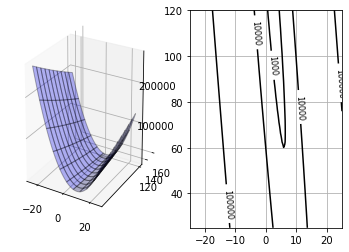

In [38]:
ax = plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,
               color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1,2,2)
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                  levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)

plt.grid(True)
plt.show()